In [1]:
suppressMessages(library(ComplexHeatmap))
suppressMessages(library(ArchR))
suppressMessages(library(anndataR))
library(circlize)

circlize version 0.4.16
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))




In [2]:
df = read.csv('../../results/04_spatial/15_integrate_with_cell_proportion/cell_type_proportion_in_spatial_niche.csv', row.names = 1, check.names = FALSE)

In [3]:
df[df>2] <- 2
df[df < -2] <- -2

In [4]:
ht <- Heatmap(as.matrix(df),
              name = 'Z-score',
              rect_gp = gpar(col = "black", lwd = 0.5),
              col = ArchR::paletteContinuous("blueYellow", n = 100),
             # cluster_columns = TRUE,
             # cluster_rows = TRUE,
             # clustering_method_rows = 'ward.D2',
             # clustering_method_columns = 'ward.D2'
            column_order = c("1", "3", "0", "10", "6", "7", "8", "11", "9", "4", "2", "5"),
              row_order = c("Endothelial", "Pericytes", "Fibroblasts", "Keratinocytes", "Langerhans cells",
                            "Smooth Muscle", "T cells", "cDC", "NK cells", "Monocytes",
                            "Macrophages", "Mast cells", "Plasma cells", "B cells", "pDC",
                            "Neural", "Melanocytes")
             )

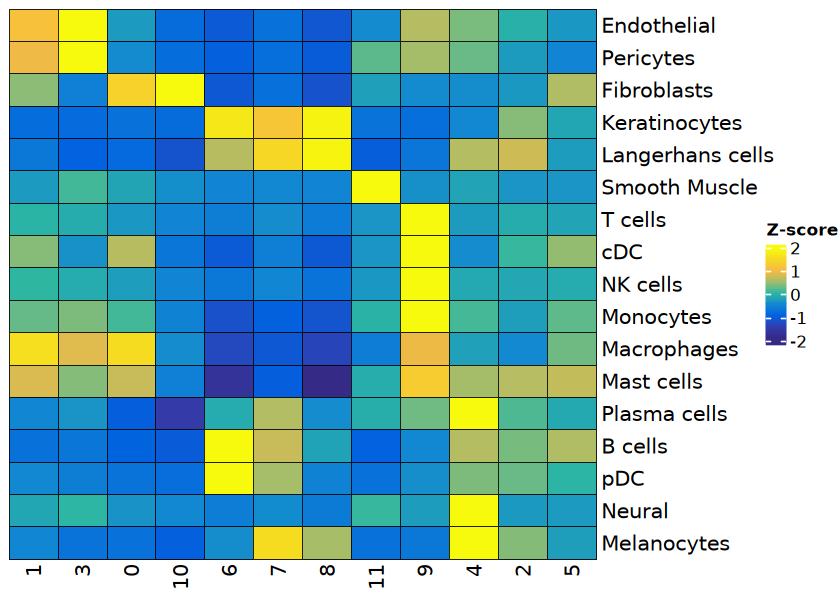

In [5]:
options(repr.plot.height = 5, repr.plot.width = 7)

draw(ht)

In [6]:
df = read.csv('../../results/04_spatial/15_integrate_with_cell_proportion/cell_type_prop_in_niches.csv', row.names = 1, check.names = FALSE)

In [7]:
rownames(df)

[1] "B cells"          "Endothelial"      "Fibroblasts"      "Keratinocytes"   
 [5] "Langerhans cells" "Macrophages"      "Mast cells"       "Melanocytes"     
 [9] "Monocytes"        "NK cells"         "Neural"           "Pericytes"       
[13] "Plasma cells"     "Smooth Muscle"    "T cells"          "cDC"             
[17] "pDC"

In [8]:
col_fun = colorRamp2(seq(0, 0.4, length.out=10), ArchR::paletteContinuous("whiteBlue", n = 10))

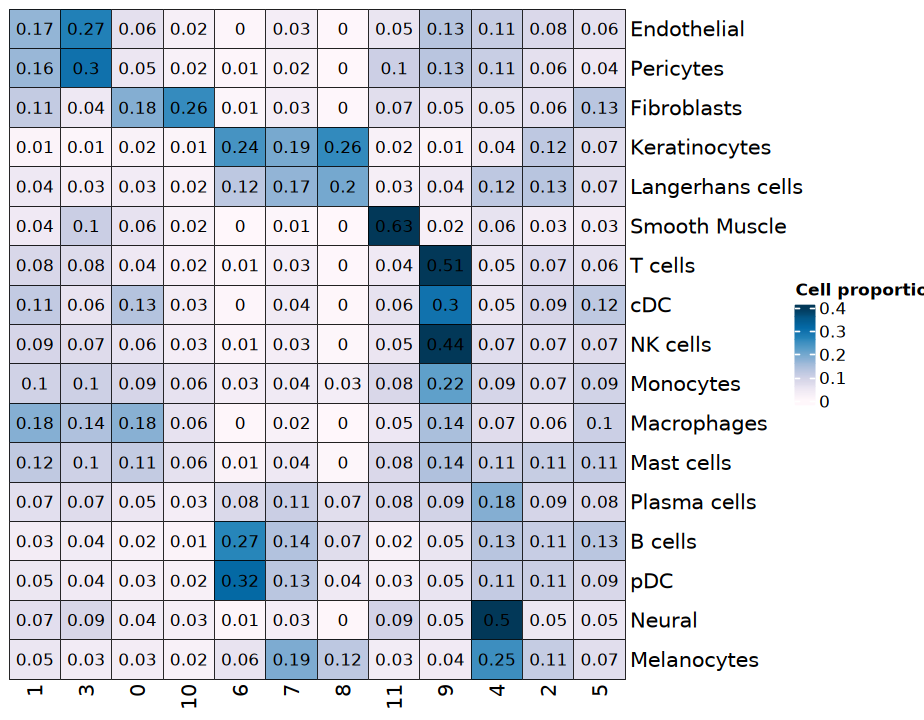

In [9]:
options(repr.plot.height = 6, repr.plot.width = 7.7)

ht <- Heatmap(as.matrix(df),
              name = 'Cell proportion',
              rect_gp = gpar(col = "black", lwd = 0.5),
              col = col_fun,
              cluster_columns = FALSE,
              cluster_rows = FALSE,
              column_order = c("1", "3", "0", "10", "6", "7", "8", "11", "9", "4", "2", "5"),
              row_order = c("Endothelial", "Pericytes", "Fibroblasts", "Keratinocytes", "Langerhans cells",
                            "Smooth Muscle", "T cells", "cDC", "NK cells", "Monocytes",
                            "Macrophages", "Mast cells", "Plasma cells", "B cells", "pDC",
                            "Neural", "Melanocytes"),
              #clustering_distance_columns = "pearson",
              #clustering_distance_rows = "pearson",
              #clustering_method_rows = 'ward.D2',
              #clustering_method_columns = 'ward.D2',
              cell_fun = function(j, i, x, y, w, h, fill) 
              {
                  grid.text(round(df[i, j], 2), x, y, gp = gpar(fontsize = 10))
              }
             )

draw(ht)

In [10]:
df = read.csv('../../results/04_spatial/15_integrate_with_cell_proportion/cell_type_prop_in_niches_v2.csv', 
              row.names = 1, check.names = FALSE)

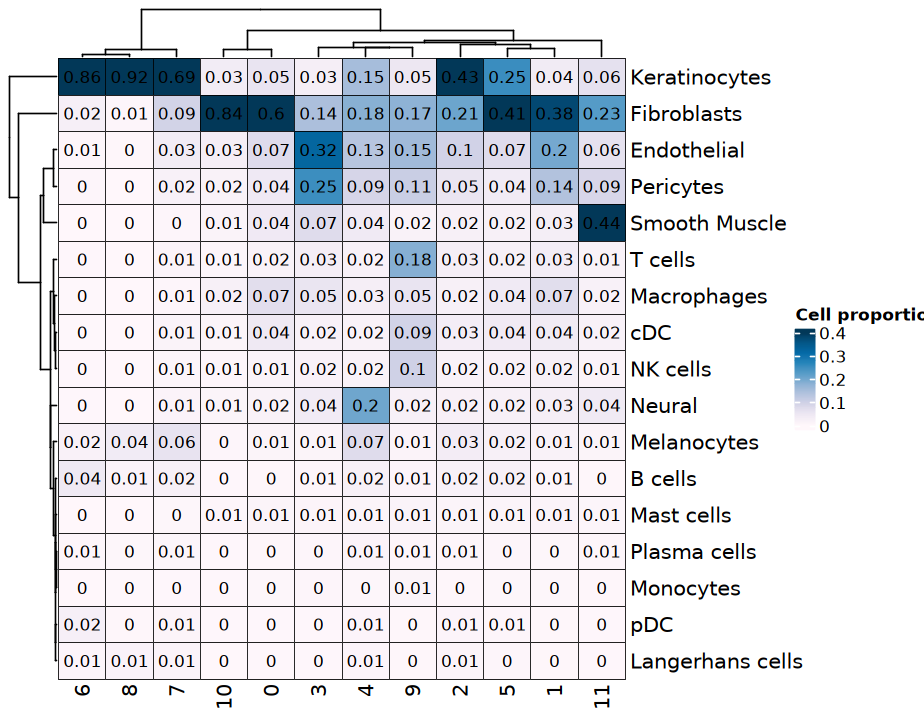

In [11]:
options(repr.plot.height = 6, repr.plot.width = 7.7)

col_fun = colorRamp2(seq(0, 0.4, length.out=10), ArchR::paletteContinuous("whiteBlue", n = 10))

ht <- Heatmap(as.matrix(df),
              name = 'Cell proportion',
              rect_gp = gpar(col = "black", lwd = 0.5),
              col = col_fun,
             cluster_columns = TRUE,
             cluster_rows = TRUE,
             clustering_method_rows = 'ward.D2',
             clustering_method_columns = 'ward.D2',
              cell_fun = function(j, i, x, y, w, h, fill) 
              {
                  grid.text(round(df[i, j], 2), x, y, gp = gpar(fontsize = 10))
              }
             )

draw(ht)